# Heart Disease Prediction

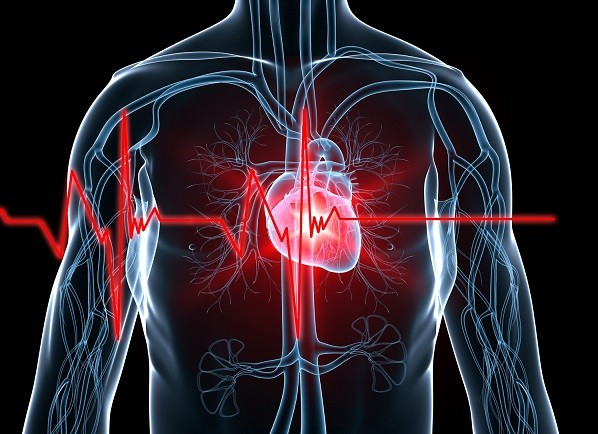

# Project Objective : 

Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

# Step-1: Import Important Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All modules Loaded Successfully')

All modules Loaded Successfully


# Step-2 : Loading Data

In [2]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step-3: Understanding Data using EDA

In [3]:
#3.1 Data Head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#3.2 Data Tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#3.3 Data Shape
df.shape

(303, 14)

In [6]:
#3.4 Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#3.5 Data Columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Description
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``


###### 3.7: Checking Null Values

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8: Column stats

In [9]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


###### 3.9: Each Column Univariate Analysis

In [10]:
for i in df:
    print(f'column_{i}',df[i].unique())
    print('==================',end = '\n\n')

column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

column_sex [1 0]

column_cp [3 2 1 0]

column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 3

###### 3.10: Each Numerical Features Histplot Distribution

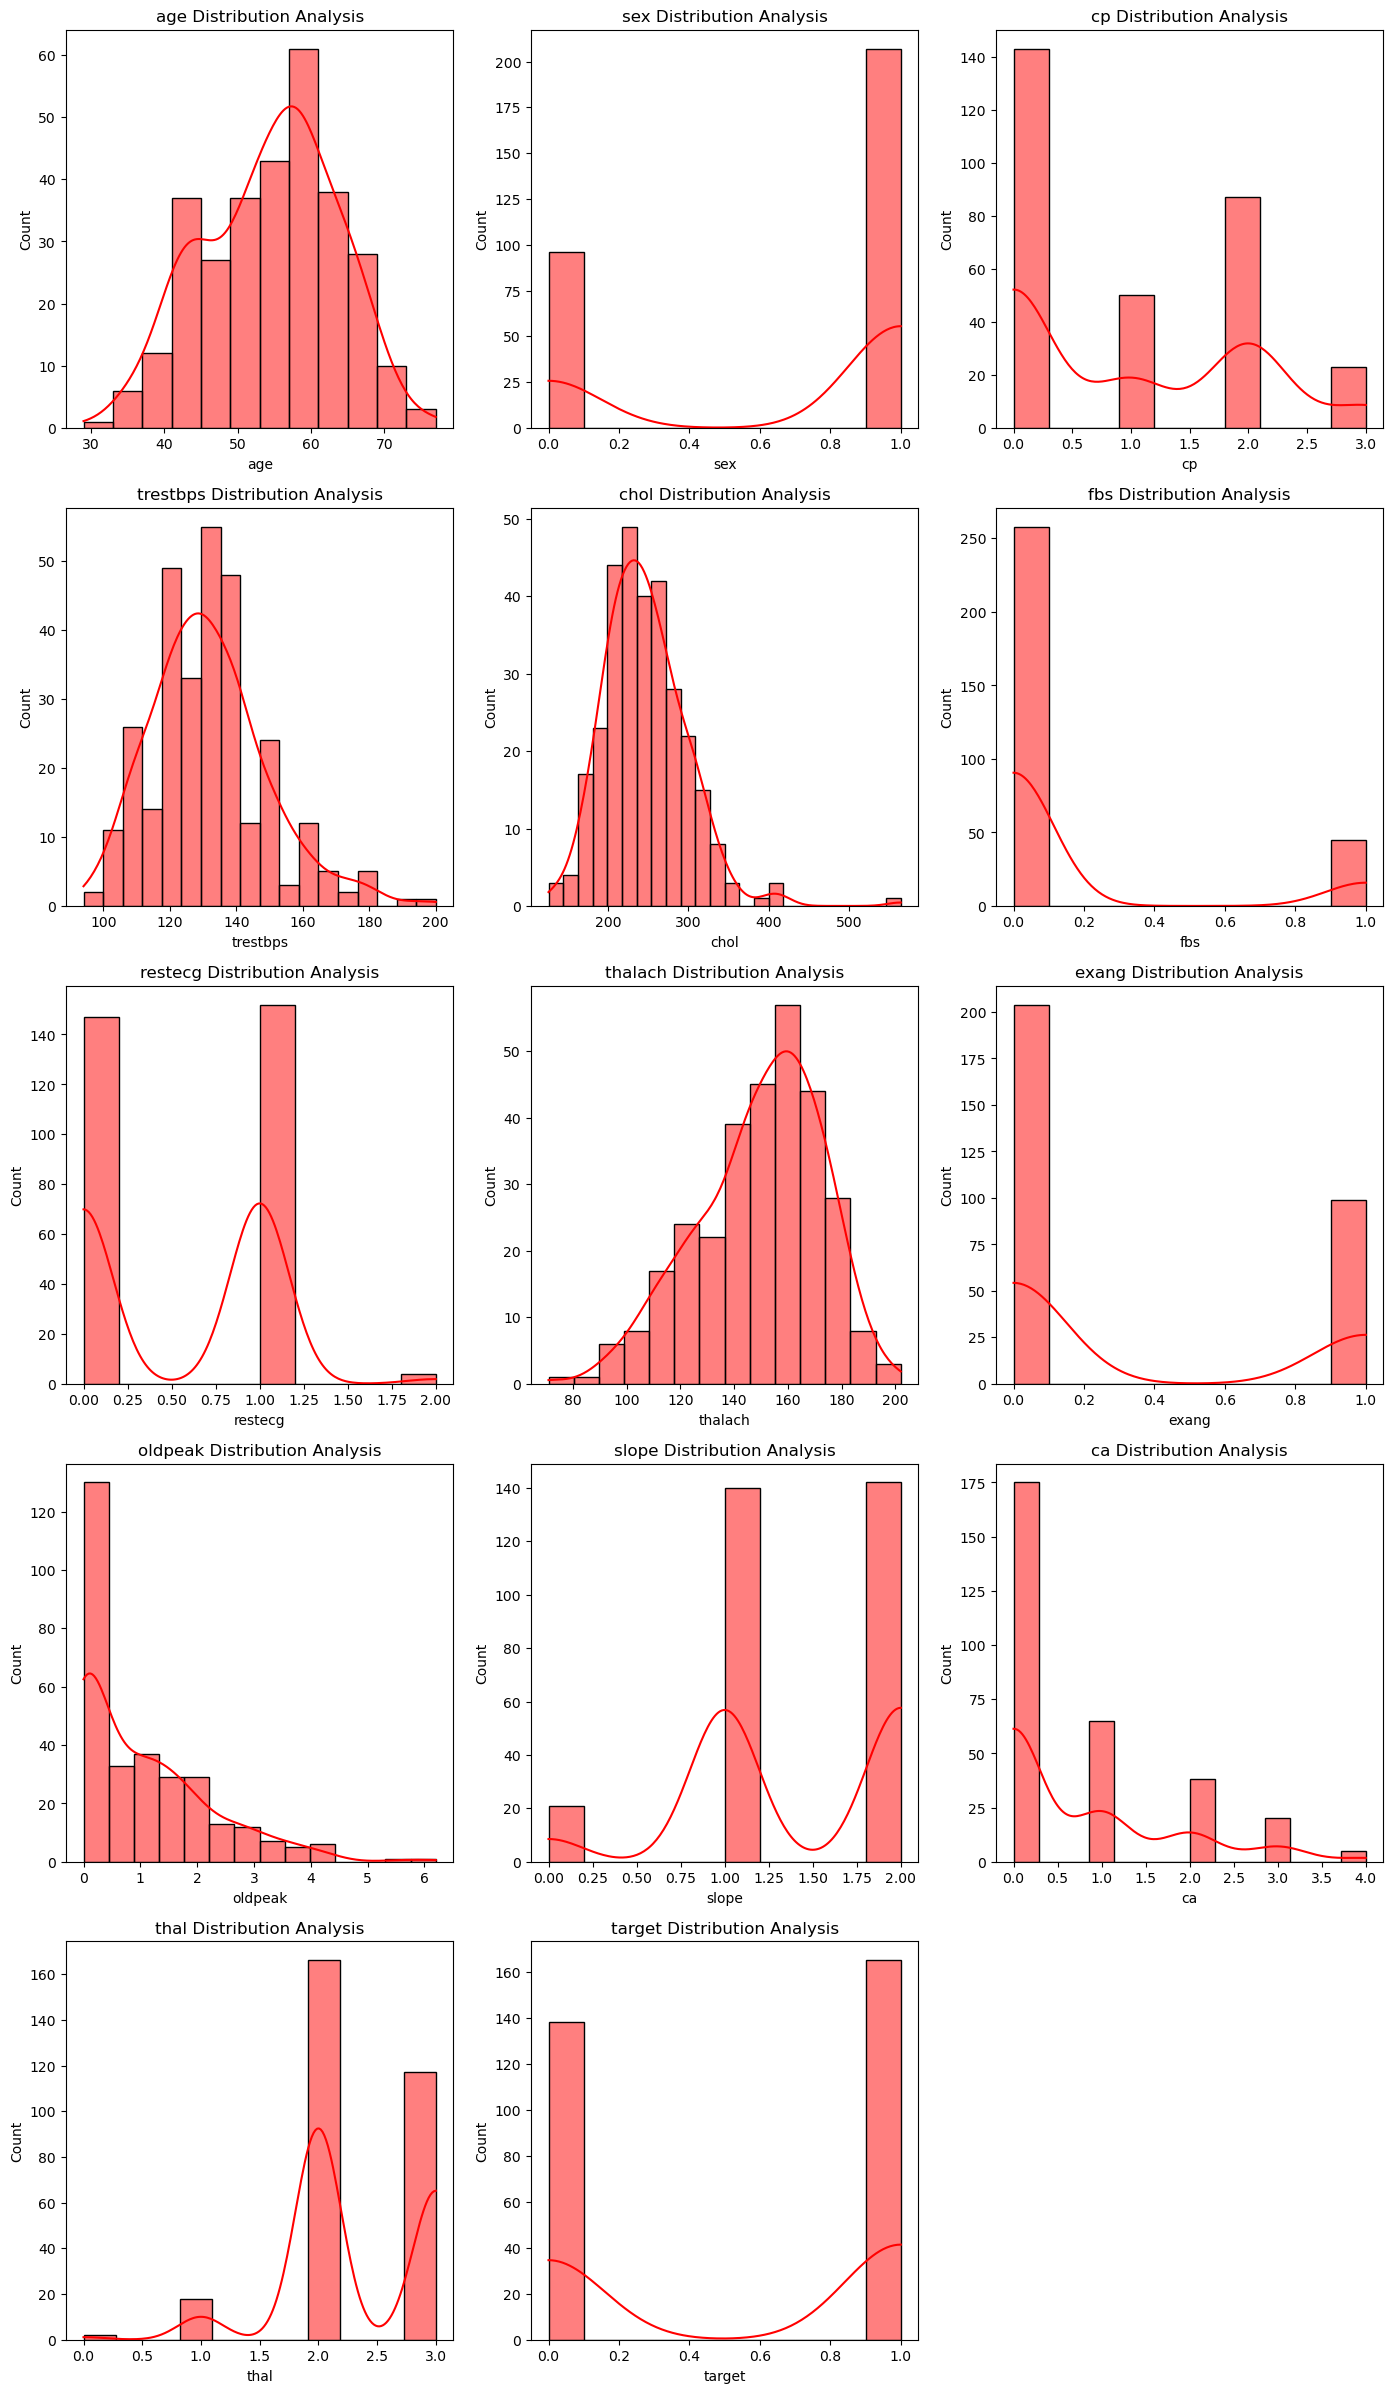

In [11]:
r = 5
c = 3
plt.figure(figsize = (17,30))
for i,j in enumerate(df): 
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis')
    sns.histplot(df[j],kde = True, color = 'r')

plt.savefig('All Numerical Feature Analysis.jpg',dpi = 1000)
plt.show()

In [12]:
# Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

###### 3.11: Bivariate Analysis, To check Correlation of features v/s target

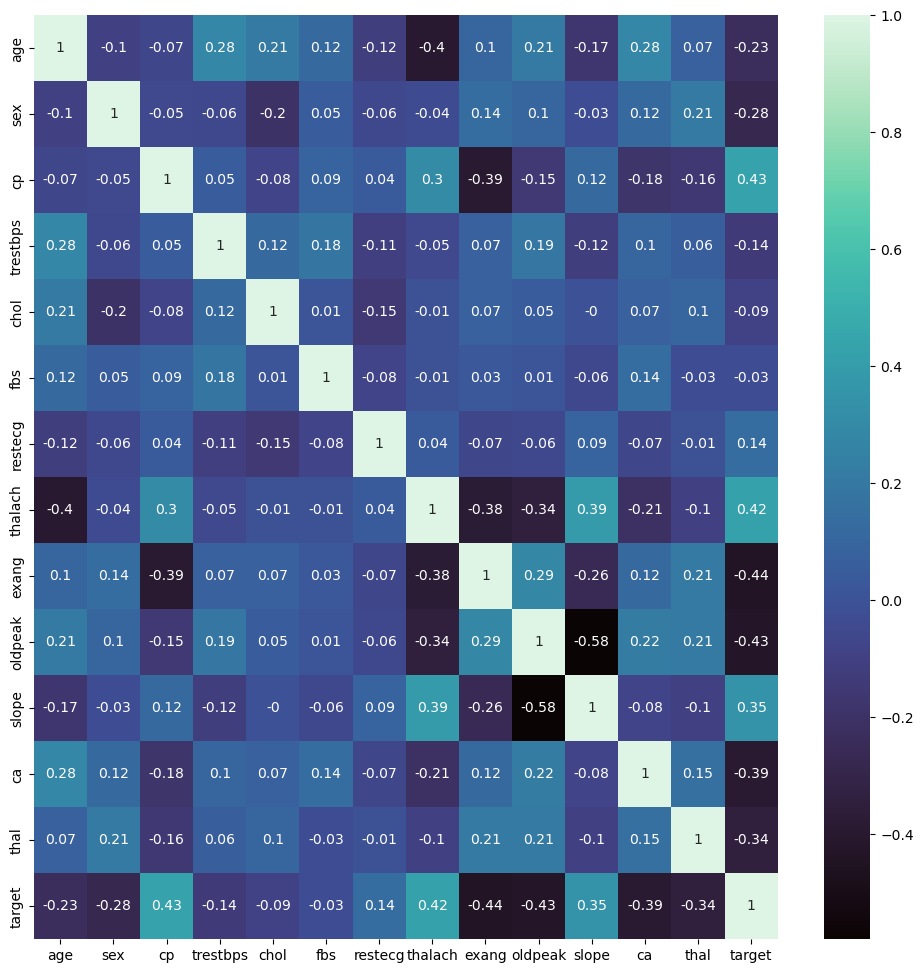

In [13]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [14]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [15]:
df.corr()['target'].sort_values (ascending = False).reset_index()

,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

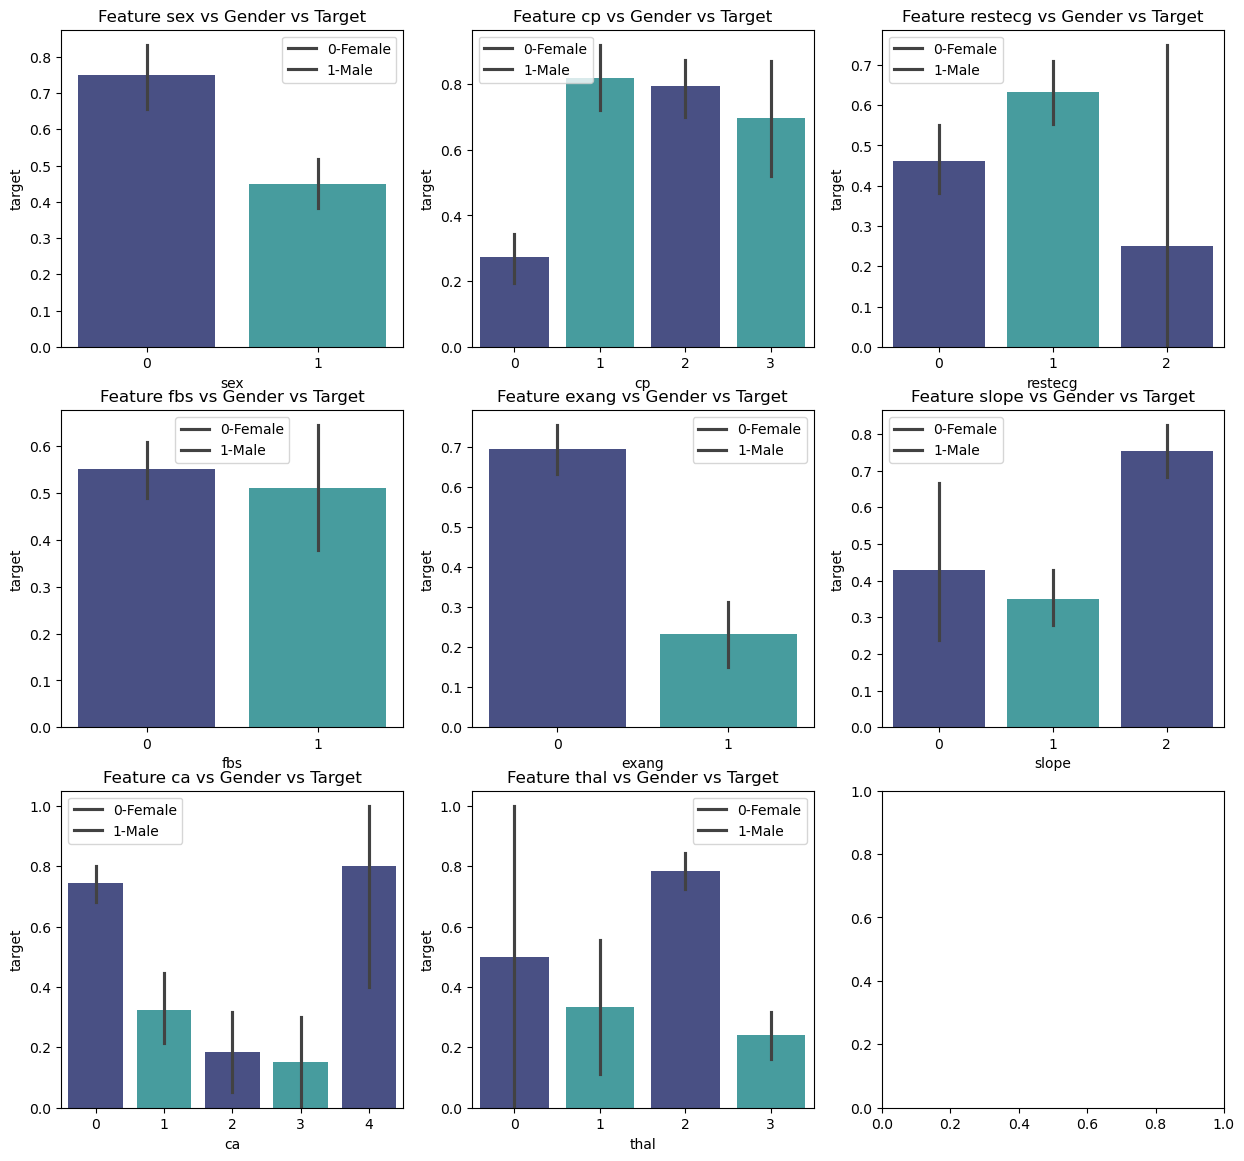

In [17]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        ...

plt.show()

###### Step - 3.13: Features v/s target Comparison

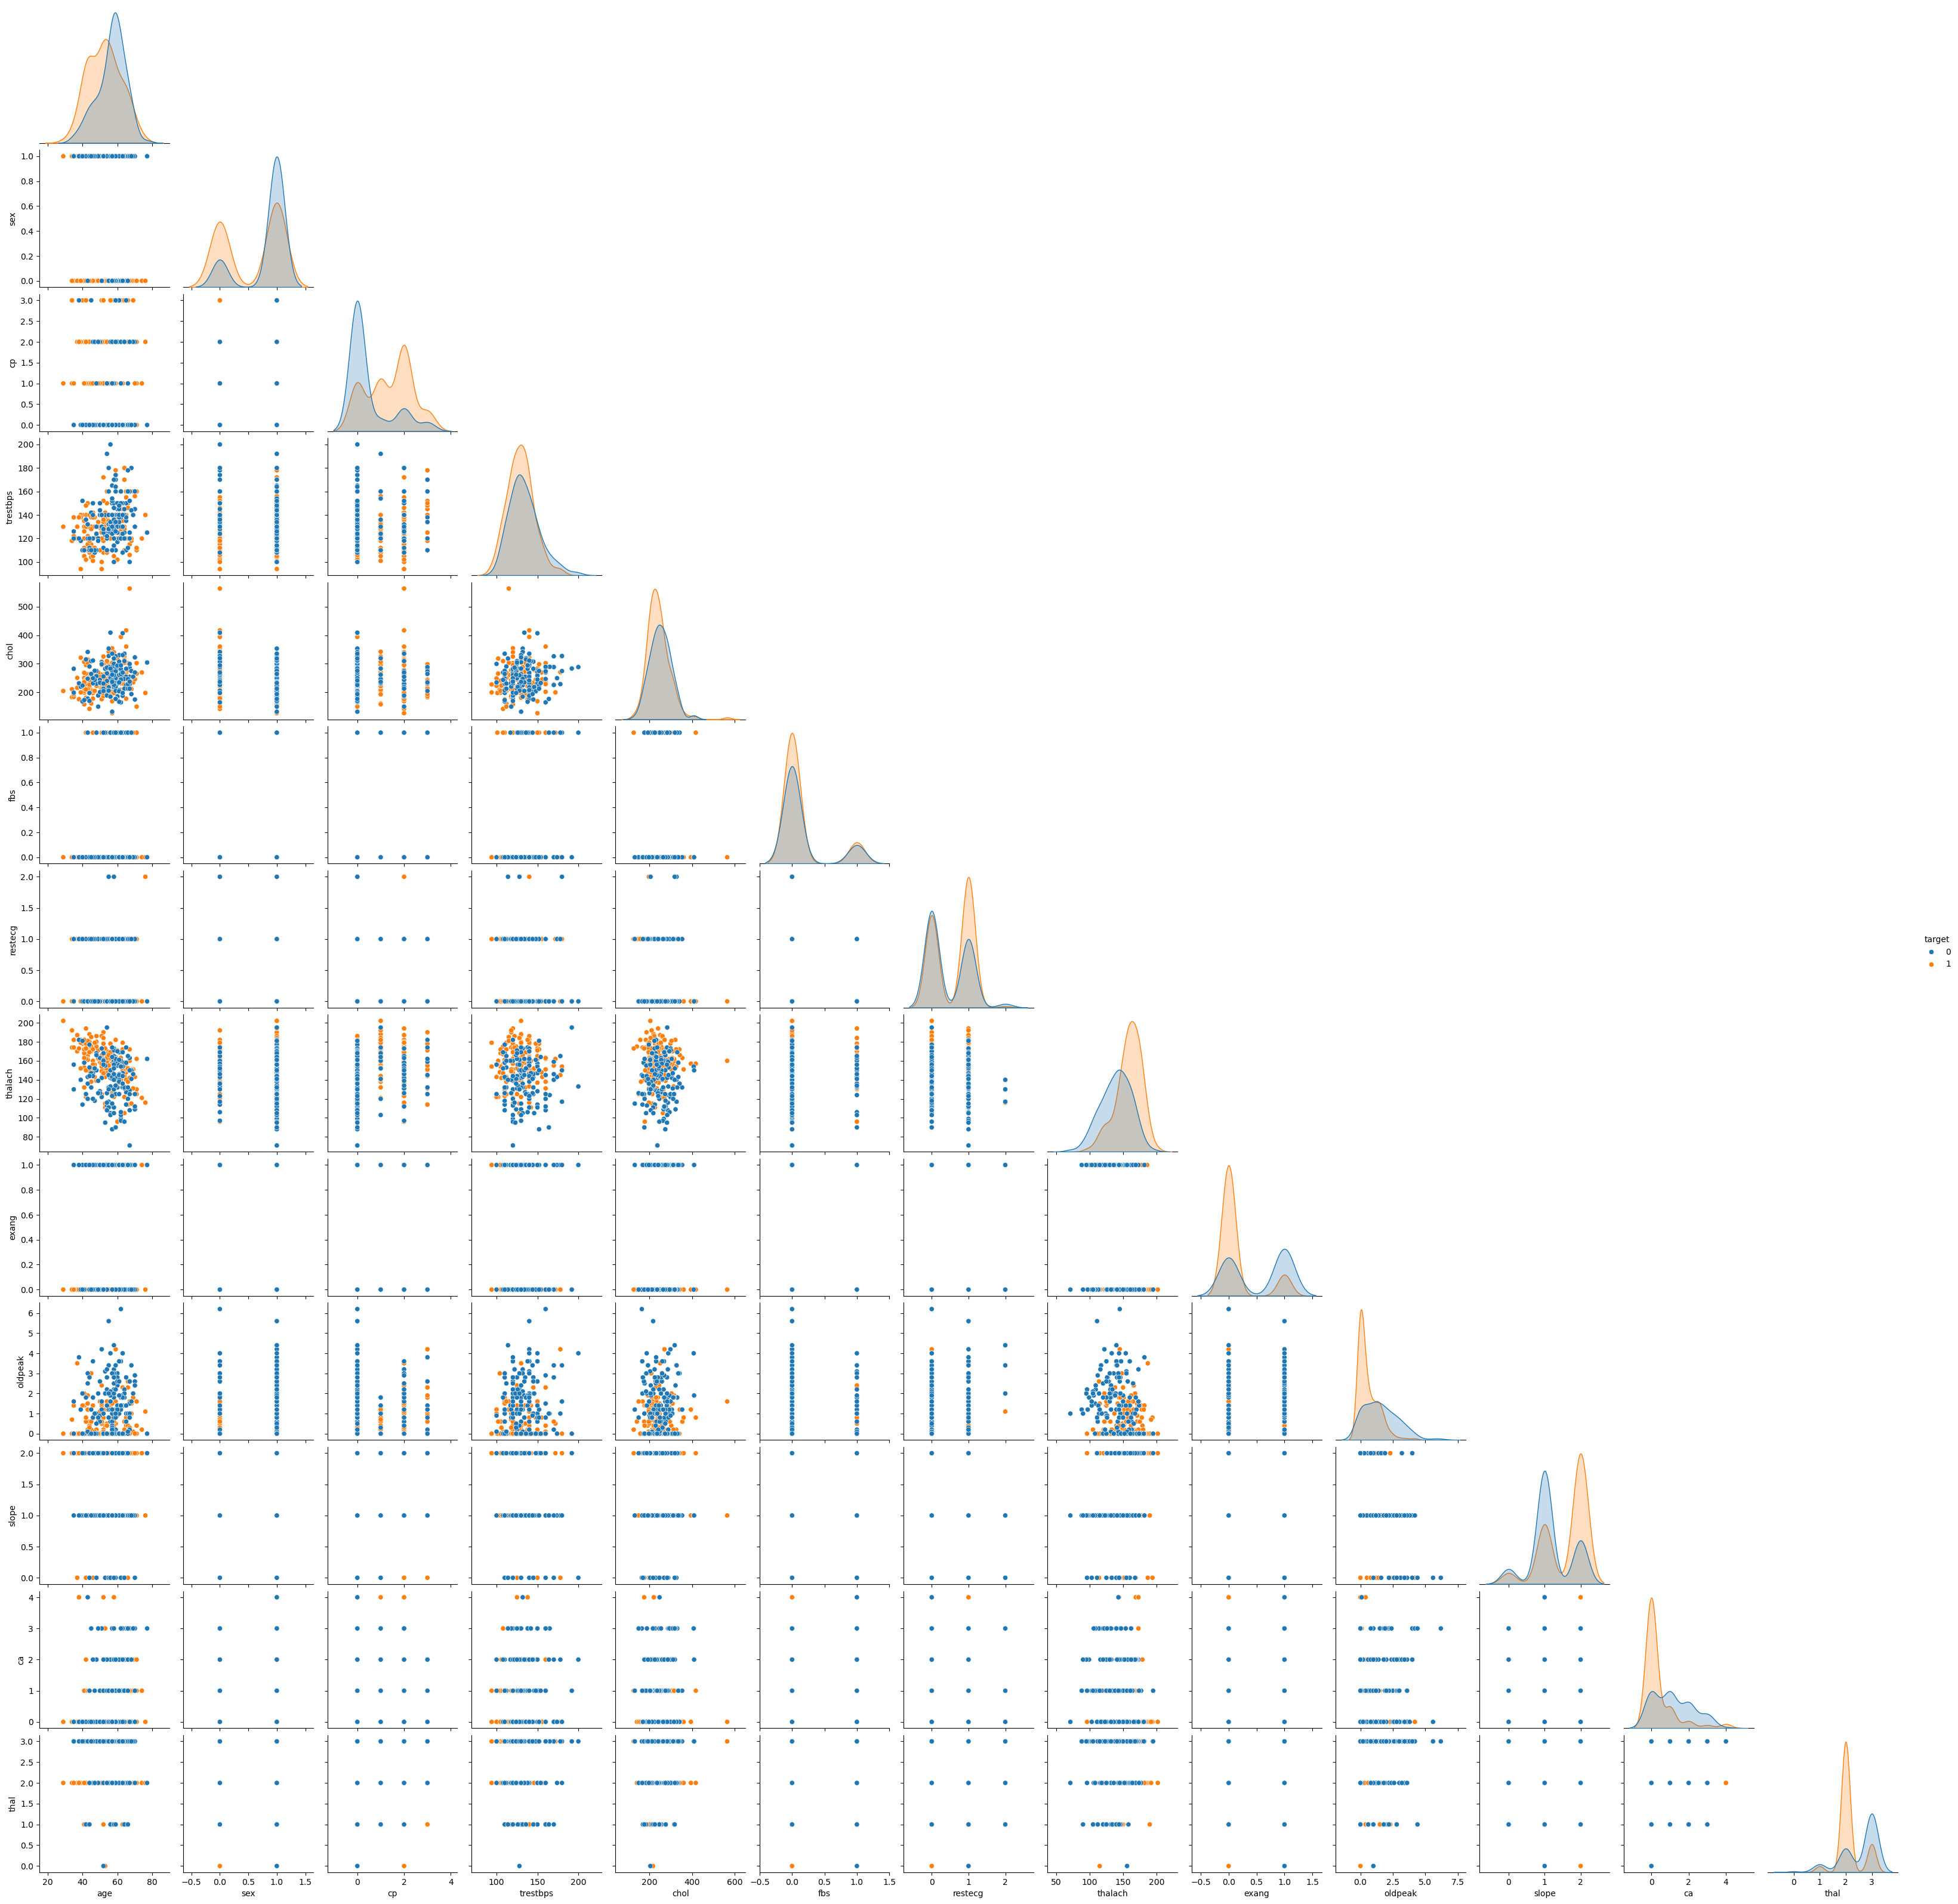

In [18]:
sns.pairplot(data = df, hue = 'target',corner = True)
plt.show()

# Step-4: Divide Data Into Train and Test

###### Train Test Split

In [19]:
#4.1 Divide Data into Target and Features 

X = df.iloc[:,:-1]
y = df['target']

In [20]:
X.shape , y.shape

((303, 13), (303,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [22]:
print('Shape of X-train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X-train:  (242, 13)
Shape of X_test:  (61, 13)
Shape of y_train:  (242,)
Shape of y_test:  (61,)


# Step-5: Multi Model Creation

In [23]:
# Because target value: only: 0,1(Binary classification)
# This is not a regression problem

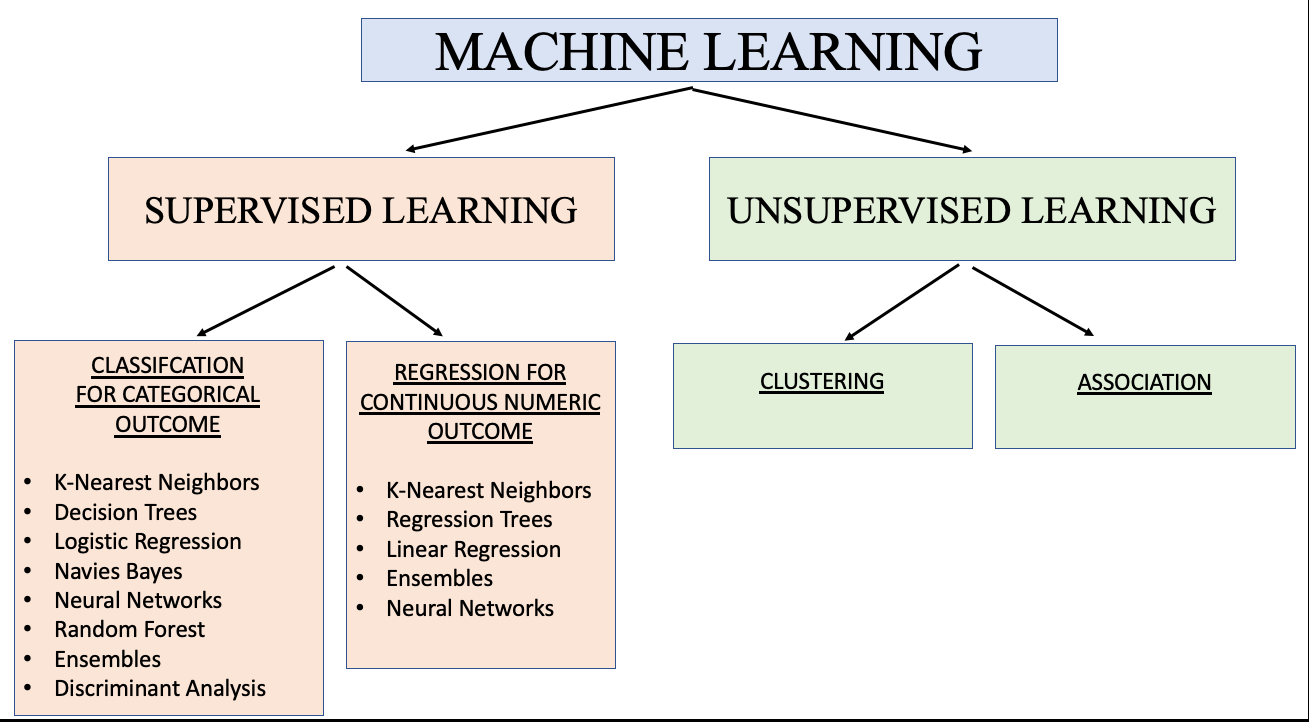

### Step-5.1: Logistic Regression Model

In [24]:
# It uses the concept of Sigmoid Function: Linear Points get converted to Sigmoid(s) curves

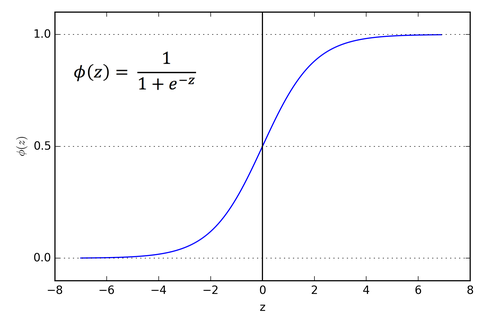

In [25]:
# Logistic Regression: We can solve Binary and Multiclass classification

###### Step-5.1.1 : Import Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()     #Model Object

model_lr.fit(X_train,y_train)   # Training/Model Building 

LogisticRegression()

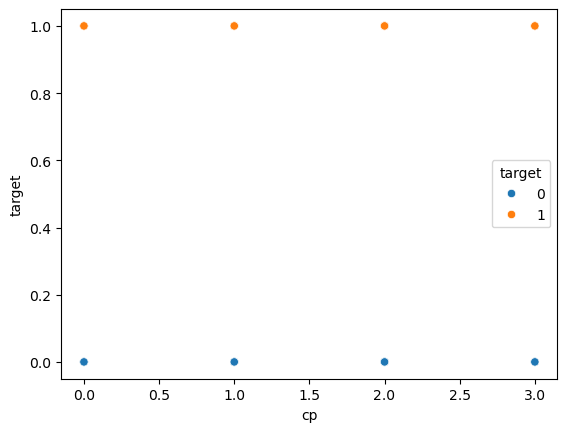

In [33]:
sns.scatterplot(data = df, x = 'cp', y = 'target', hue = 'target')
plt.show()

In [34]:
y_pred = model_lr.predict(X_test)
# y_pred

In [35]:
lr_score = accuracy_score(y_test,y_pred)
lr_score

0.8852459016393442

###### Step - 5.1.2: Import model evalutation metrices 

In [36]:
# It will be called only when problem is od classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

###### Step - 5.1.3 Import Confusion Matrix to evaluate classificationModel

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_test, y_pred)

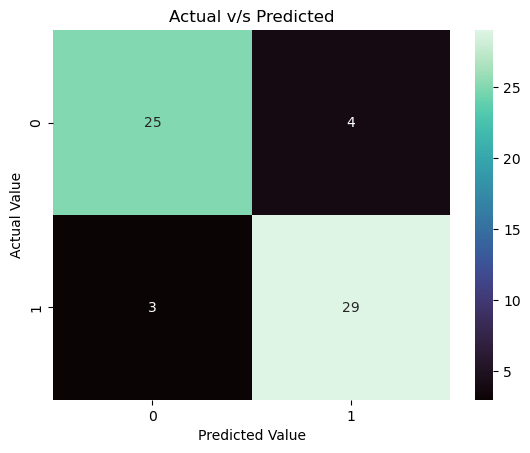

In [39]:
plt.title('Actual v/s Predicted')
sns.heatmap(cm, annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [40]:
pr = 25/28
pr

0.8928571428571429

In [41]:
TN,FP,FN,TP = cm.ravel()

In [42]:
precision_score(y_test,y_pred)

0.8787878787878788

In [43]:
ps = TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [44]:
acs = (TN + TP)/cm.sum()
acs

np.float64(0.8852459016393442)

In [45]:
print(accuracy_score(y_test,y_pred))

0.8852459016393442


In [46]:
rs = recall_score(y_test,y_pred) 
print('Recall Score is: ',rs)

Recall Score is:  0.90625


In [47]:
# F1 score to evaluate both Precision and Recall Score

In [48]:
f1_sc = f1_score(y_test,y_pred)

In [49]:
print('F1 score: ',f1_sc)

F1 score:  0.8923076923076924


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [51]:
# Model score = accuracy score
model_lr.score(X_test,y_test)

0.8852459016393442

###### Step-5.2: NaiveBayes ML Model

In [52]:
# pre assumption: It will pre-assume No correlation b/w features 

###### Step- 5.2.1 Import Naive Model

In [53]:
from sklearn.naive_bayes import GaussianNB
# MultinomialNB used in multi class classification
# GaussianNB used in case of binary classification

model_nv = GaussianNB()

model_nv.fit(X_train,y_train) # Train part learning

GaussianNB()

In [54]:
y_pred = model_nv.predict(X_test)

In [55]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score: ',nv_score)

Naive Bayes Score:  0.8688524590163934


In [56]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8688524590163934
Precision Score:  0.9
Recall Score:  0.84375
F1 Score:  0.8709677419354839


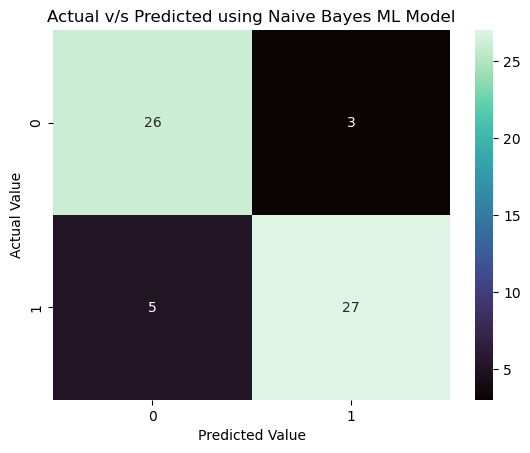

In [57]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Step- 5.3: Support Vector ML Model 

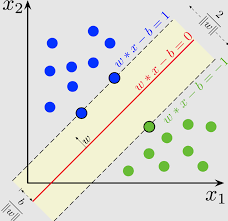

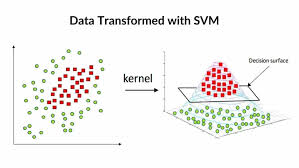

###### Step- 5.3.1:- Import SVM Model 

In [59]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

In [60]:
y_pred = model_svc.predict(X_test)

###### Step- 5.3.3:- Checking and Confusion Matrix

In [61]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



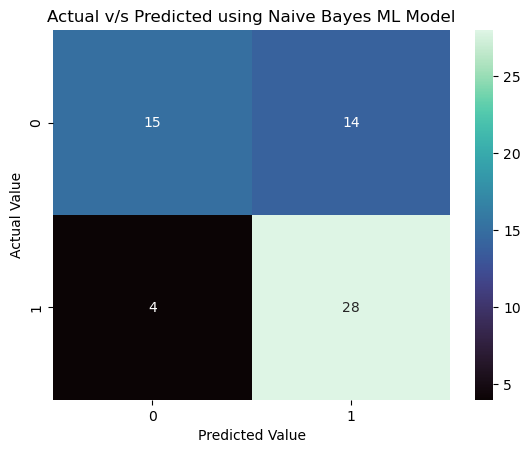

In [63]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [64]:
svm_score = accuracy_score(y_test,y_pred)

In [65]:
lr_score,nv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

In [66]:
model_svc.score(X_test,y_test)

0.7049180327868853

# Step- 5.4: Decision Tree ML Model 

Iris Flower Information: 
Sepal Length 
Sepal Width 
Petal Length 
Petal Width 

Iris Species:
1. Iris Versicolor
2. Iris Setosa
3. Iris Virgilica

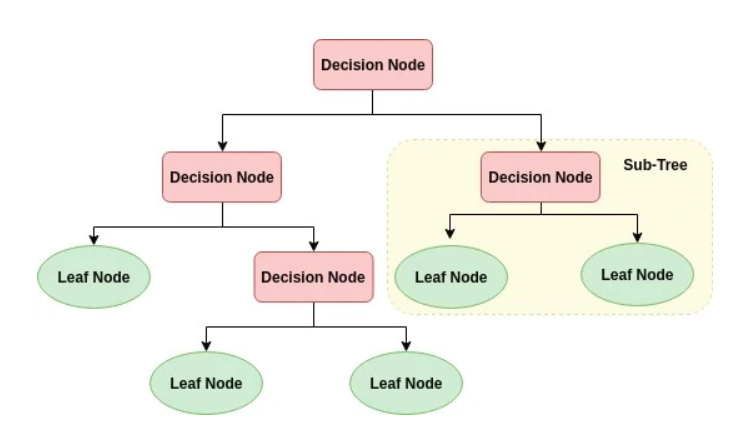

# Step- 5.4.1: Import Decision Tree Model

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step - 5.4.2 : Predict y_pred

In [69]:
y_pred = model_dt.predict(X_test)

In [70]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.819672131147541
Precision Score:  0.92
Recall Score:  0.71875
F1 Score:  0.8070175438596491


In [71]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.819672131147541

In [72]:
from sklearn.tree import plot_tree

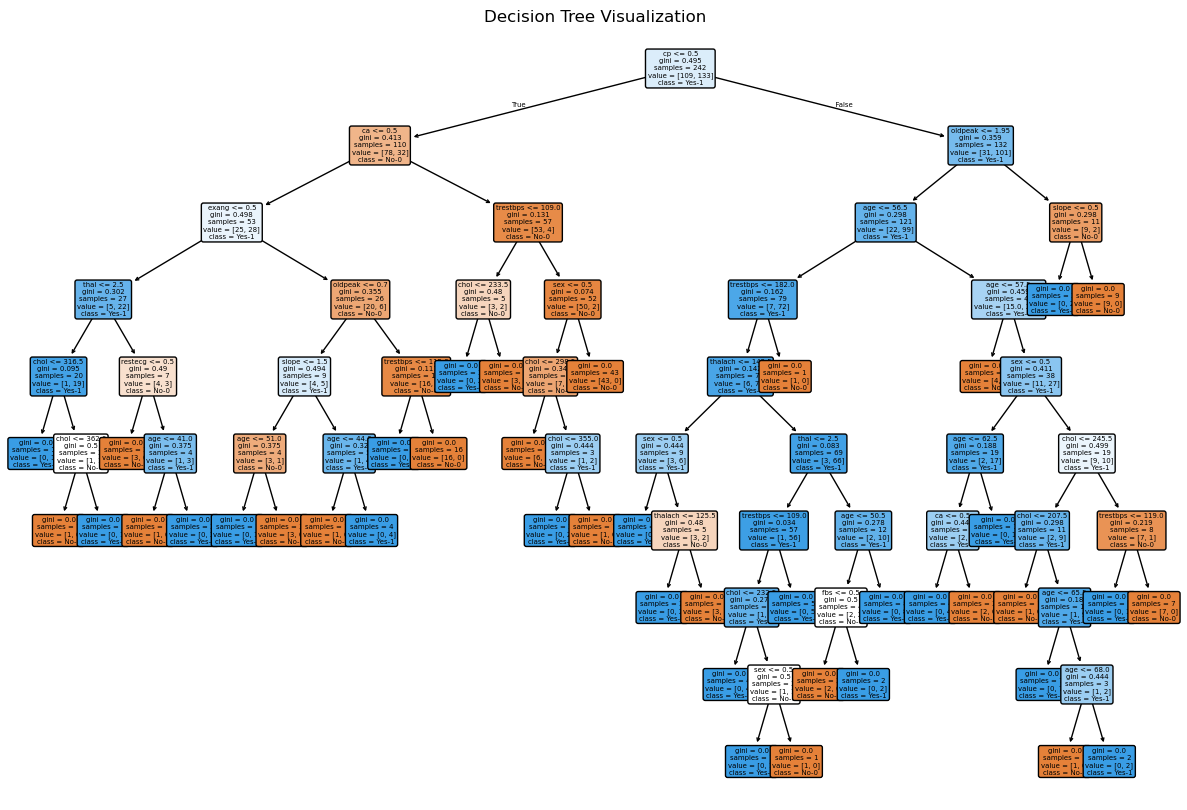

In [73]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

# Step 5.5: Ensemble ML Model
- `Bagging Technique`: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority
- `Boosting Technique`: Next model learn from previous model and boost it minimize error to improve score

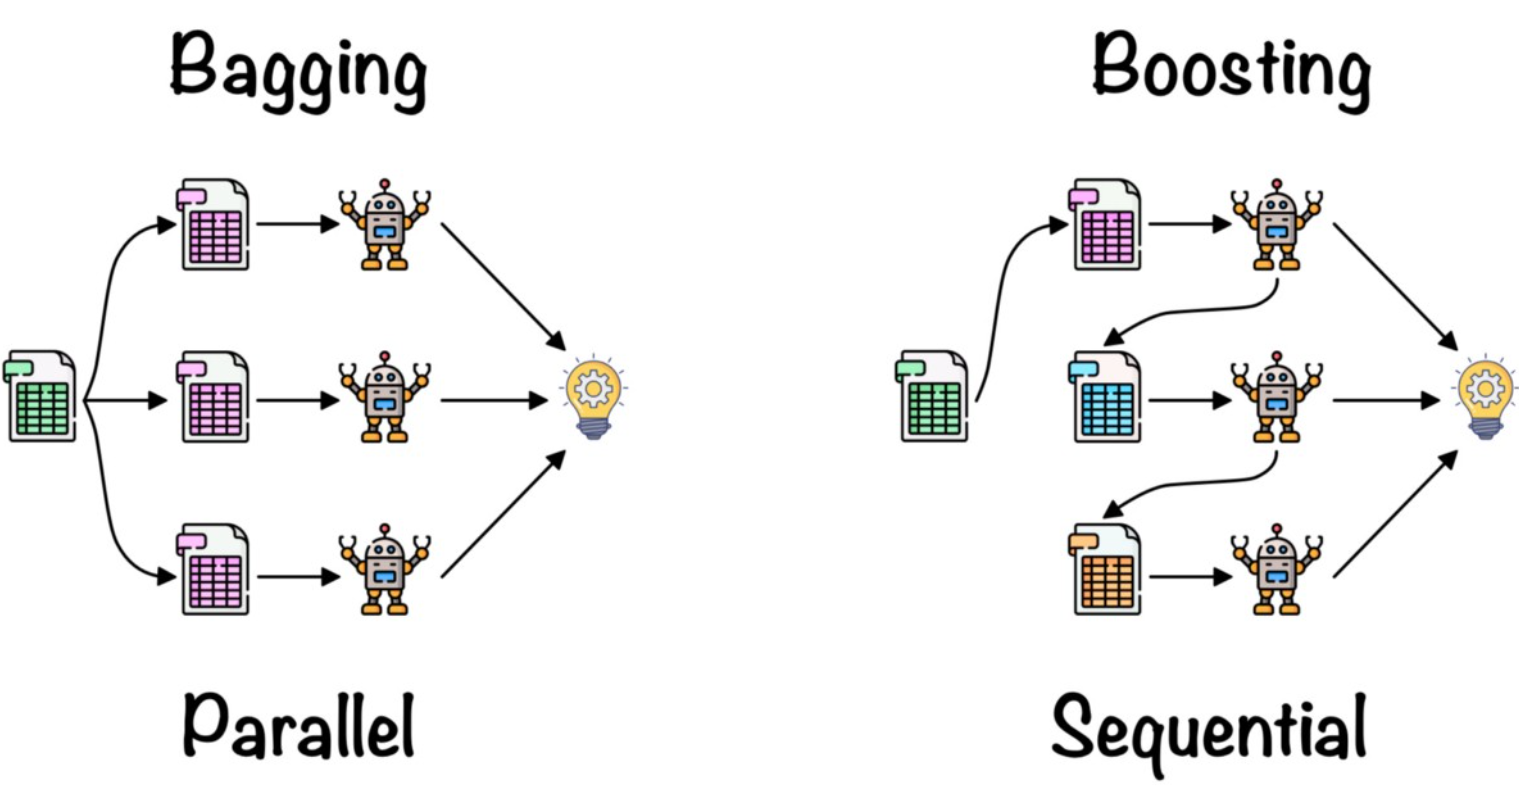

# Step- 5.5.1 Bagging Technique >>>>>Random Forest

In [74]:
# Default number of trees in random forest is 100 
# Randome forest is a part of bagging technique (bagging technique is a part of ensemble technique)

###### Step- 5.5.2 : Import Random Forest Model

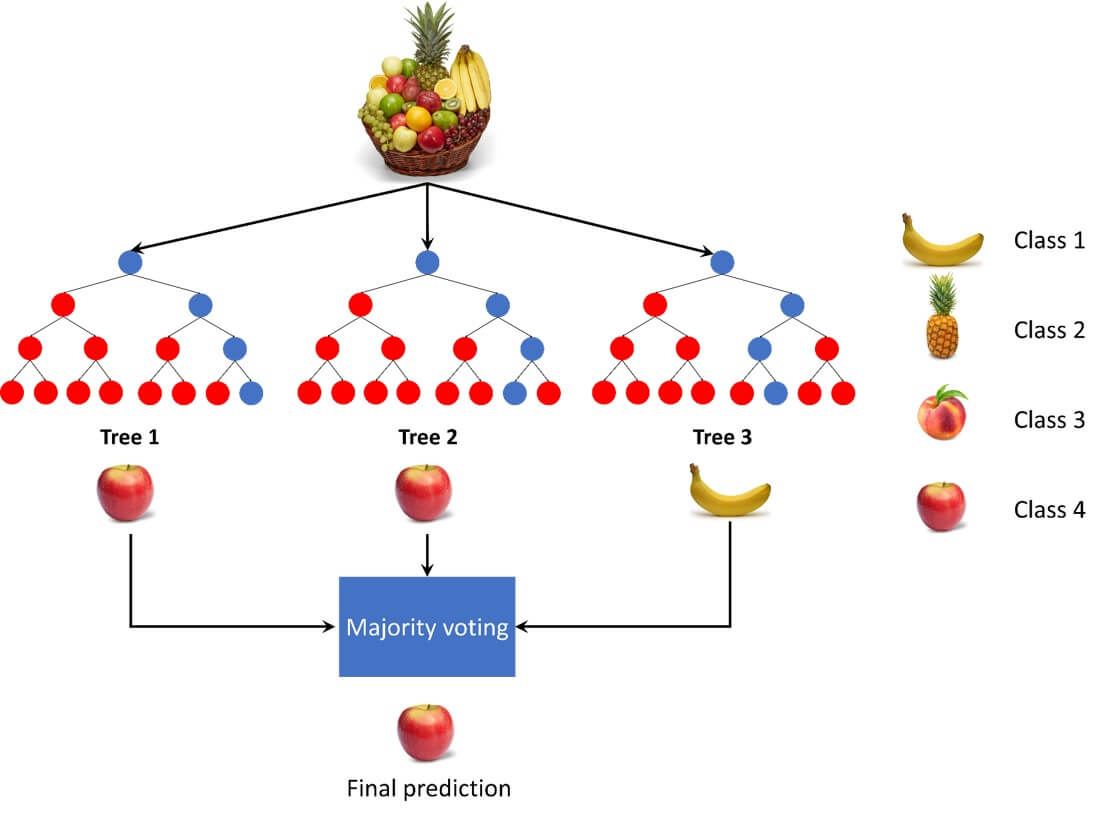

In [75]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators = 200) # Parameter change from default(100) to 200

model_rf.fit(X_train,y_train)  # Learning part 

RandomForestClassifier(n_estimators=200)

###### Step-5.5.3 : y_pred based on X_test

In [76]:
y_pred = model_rf.predict(X_test)

In [77]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8524590163934426
Precision Score:  0.8484848484848485
Recall Score:  0.875
F1 Score:  0.8615384615384616


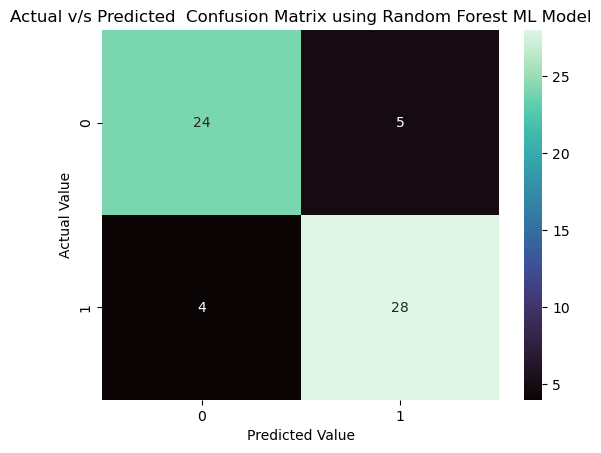

In [78]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted  Confusion Matrix using Random Forest ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [79]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8524590163934426

### Ensemble Boosting Technique: Adaboost, GradientBoost, XGboost

In [80]:
# Adaboost      : Adaptive Boosting
# GradientBoost : GBM
# LBM           : GradientBoost             : LGBM
# XGboost       : Extreme Gradient Boosting
# Catboost      : Categorical               : Textual Data

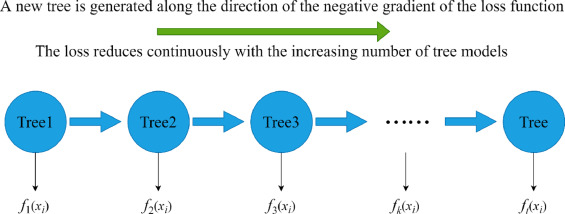

In [81]:
# pip install xgboost

In [82]:
import xgboost 
print('Done')

Done


In [83]:
from xgboost import XGBClassifier 

model_xgb = XGBClassifier()

model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
y_pred = model_xgb.predict(X_test)

In [85]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.819672131147541

## Step - 5.7 : KNN
Can be used for both regression and classification

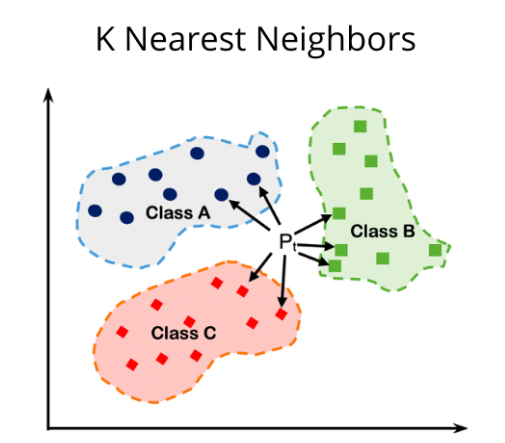

## Step- 5.7.1 : Import KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
model_knn = KNeighborsClassifier(n_neighbors = 14) # k = 14

model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [88]:
y_pred = model_knn.predict(X_test)

In [89]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



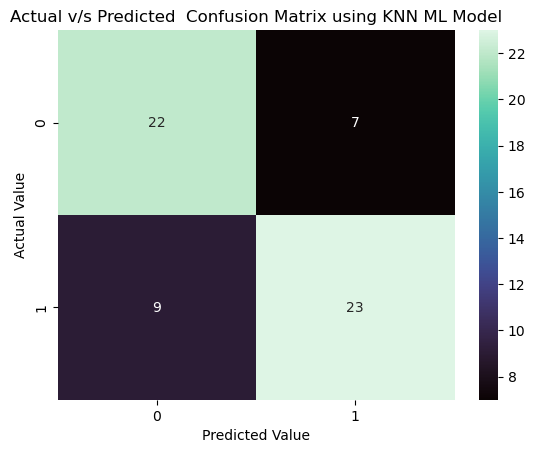

In [91]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted  Confusion Matrix using KNN ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Step - 5.8: Artificial Neural Network using Deep Learning 

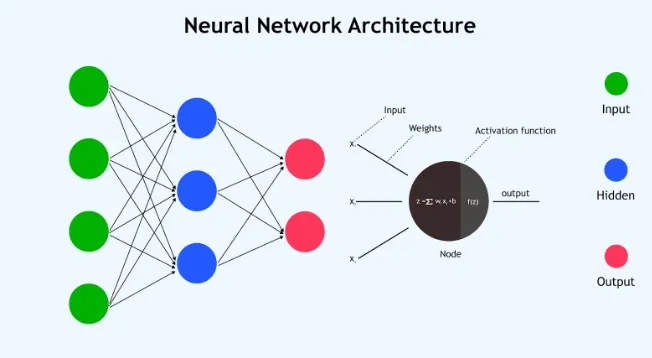

In [92]:
# ML works only on Limited data
# If input changes ML Model fails

In [93]:
# Deep Learning means making dense(Deep) Neural Network : trained on multiple possibilities

In [94]:
# keras tensor flow

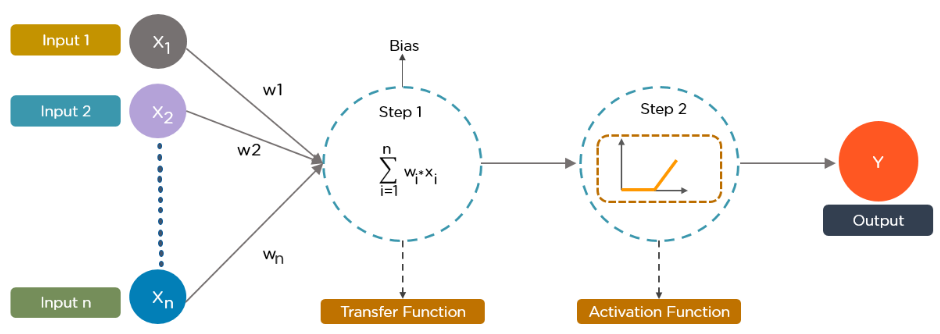

# Step- 5.8.1 : ANN Model Creation

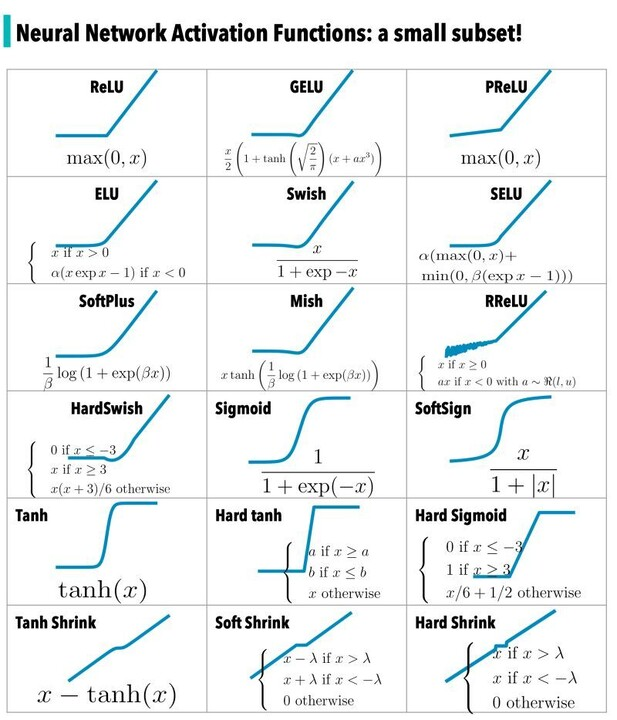

In [95]:
# pip install keras
 

In [96]:
# pip install tensorflow

In [97]:
from keras.models import Sequential 
from keras.layers import Dense

In [98]:
model_seq = Sequential()  # Step 1 Sequential model creation
model_seq.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model_seq.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model_seq.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [99]:
model_seq.fit(X_train,y_train,epochs = 300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4504 - loss: 82.8861  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 74.5783 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 66.9383 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 59.1711 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 51.1396 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 42.8315 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 34.6031 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4421 - loss: 26.3745 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4091 - loss: 18.7906 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3636 - loss: 14.3681 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3760 - loss: 12.5140 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [100]:
# Step- 5.8.4 pred y_value

y_pred = model_seq.predict(X_test)
y_pred = [round(i[0])for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [101]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8360655737704918

In [102]:
all_model_score = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','KNN','ANN']
# print(len(all_model_score))
print('Done')

Done


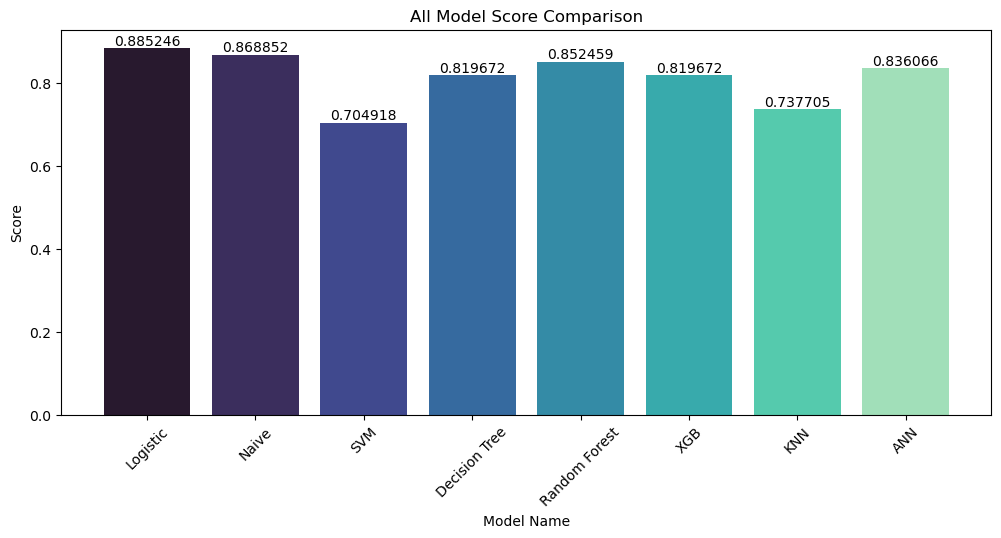

In [103]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# Step-7: Best Model Save 

In [104]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [105]:
os.getcwd() 

'C:\\Users\\Aaryan Bhardwaj\\Heart Disease Prediction'

In [106]:
# Steps to Deploy: 

# Live Deployment :
# requirements.txt
# github upload
# streamlit upload